In [1]:
import simulation_functions
import numpy as np


sim=simulation_functions.start_simulation(5,10000,200)

In [2]:
park_info=sim[0][1:] #first row doesnt include any information, so we remove it 

peak_matrix=np.zeros((park_info.shape[0],park_info.shape[1]))
peak_matrix[:,0]=park_info[:,0]

for i in range(1,park_info.shape[1]):
    for j in range(park_info.shape[0]-1):
        if park_info[j,i]!=park_info[j+1,i] and park_info[j,i]!=-1:
            peak_matrix[j,i]=1

            
            
num_of_peaks_per_min=[]  
count=0        
for i in range(park_info.shape[0]):
    for j in range(park_info.shape[1]):
        if peak_matrix[i,j]==1:
            count=count+1
    num_of_peaks_per_min.append(count)
    count=0

In [3]:
num_available_lots=np.zeros((peak_matrix.shape[0],2))
num_available_lots[:,0]=peak_matrix[:,0]
num_available_lots[:,1]=num_of_peaks_per_min

(2100.0, 2290.0)

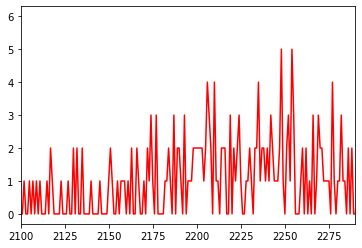

In [4]:
import matplotlib.pyplot as plt
plt.plot(num_available_lots[:,0],num_available_lots[:,1],'r-')
plt.xlim([2100,2290])

Epoch 1/100
663/663 [==============================] - 0s 599us/step - loss: 2.8917 - accuracy: 0.6350
Epoch 2/100
663/663 [==============================] - 0s 690us/step - loss: 2.5002 - accuracy: 0.6416
Epoch 3/100
663/663 [==============================] - 1s 963us/step - loss: 2.4048 - accuracy: 0.6466
Epoch 4/100
663/663 [==============================] - 1s 1ms/step - loss: 2.3700 - accuracy: 0.6499
Epoch 5/100
663/663 [==============================] - 1s 1ms/step - loss: 2.2876 - accuracy: 0.6516
Epoch 6/100
663/663 [==============================] - 1s 1ms/step - loss: 2.2807 - accuracy: 0.6514
Epoch 7/100
663/663 [==============================] - 1s 912us/step - loss: 2.2596 - accuracy: 0.6528
Epoch 8/100
663/663 [==============================] - 0s 585us/step - loss: 2.2365 - accuracy: 0.6507
Epoch 9/100
663/663 [==============================] - 0s 604us/step - loss: 2.2090 - accuracy: 0.65110s - loss: 1.9742 - ac
Epoch 10/100
663/663 [==============================] - 0

663/663 [==============================] - 0s 595us/step - loss: 0.9788 - accuracy: 0.7043
Epoch 80/100
663/663 [==============================] - 0s 545us/step - loss: 0.9542 - accuracy: 0.70240s - loss: 0.9250 - accura
Epoch 81/100
663/663 [==============================] - 0s 549us/step - loss: 0.9554 - accuracy: 0.7034
Epoch 82/100
663/663 [==============================] - 1s 1ms/step - loss: 0.9546 - accuracy: 0.7041
Epoch 83/100
663/663 [==============================] - 1s 1ms/step - loss: 0.9613 - accuracy: 0.7046
Epoch 84/100
663/663 [==============================] - 1s 1ms/step - loss: 0.9507 - accuracy: 0.7053
Epoch 85/100
663/663 [==============================] - 1s 1ms/step - loss: 0.9571 - accuracy: 0.7006
Epoch 86/100
663/663 [==============================] - 1s 1ms/step - loss: 0.9503 - accuracy: 0.7041
Epoch 87/100
663/663 [==============================] - 1s 1ms/step - loss: 0.9503 - accuracy: 0.7044
Epoch 88/100
663/663 [==============================] - 0s 620u

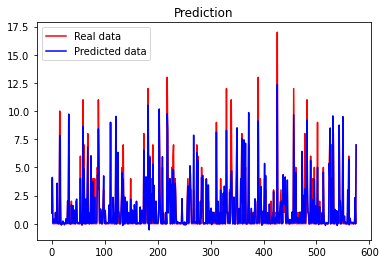

In [5]:
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential

from sklearn.preprocessing import StandardScaler

num_arrivers=np.asarray(sim[3]).reshape(-1,1)
num_leavers=np.asarray(sim[4]).reshape(-1,1)

dataset=np.hstack((num_available_lots,num_arrivers,num_leavers))

X = dataset[:, :-1]
y = dataset[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.08, random_state = 0)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


model = Sequential()

model.add(Dense(32, activation = 'relu', input_dim = 3))


model.add(Dense(units = 64, activation = 'relu'))


model.add(Dense(units = 1))


model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])


model.fit(X_train, y_train, batch_size = 10, epochs = 100)


y_pred = model.predict(X_test)


plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()